# Combinacions d'herois i encanteris
Aquest NoteBook és dividirà en dos apartats i un final per vuere les combinacions entre ells.

- Herois 
- Encanteris
- Tot junt

In [1]:
# Importar llibreries necessàries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Dades_Individuals import *
from Combinacions_herois_i_encanteris import *


In [2]:
DataSet = pd.read_csv("../LOL - Dataset/games.csv")
DataSet_champions = pd.DataFrame(pd.read_json("../LOL - Dataset/champion_info_2.json"))

# Primer mirem quines són totalment identiques
duplicated_rows = DataSet[DataSet.duplicated(keep=False)]
num_duplicated_rows = len(duplicated_rows)

# Si n'hi ha, les eliminem
DataSet_cleaned = DataSet.drop_duplicates()
DataSet_cleaned

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


Per poder visualitzar de manera més clara totes les columne que necessitem podem eliminar aquelles que, en aquest moment, no anem a utilitzar.

In [3]:
columnes_a_eliminar = [
    'creationTime', 'gameDuration', 'seasonId'
]

DataSet_herois = DataSet_cleaned.drop(columnes_a_eliminar, axis=1)
print(f"Columnes eliminades correctament")
print(f"Columnes restants: {list(DataSet_herois.columns)}")
print(f"Dimensions del dataset: {DataSet_herois.shape}")
DataSet_herois.head(5)

Columnes eliminades correctament
Columnes restants: ['gameId', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id', 't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5']
Dimensions del dataset:

,gameId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1,2,1,1,1,1,2,8,12,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1,1,1,1,0,1,1,119,7,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1,2,1,1,1,2,0,18,4,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1,1,1,1,1,1,0,57,4,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1,2,1,1,1,1,0,19,4,...,3,0,0,1,0,86,11,201,122,18


## Preparació dades
Comencem utilitzant la funció **comptar_combinacions_equip**, la qual ens ajuda a codificar les diferents combinacions d'herois per equip, d'aquesta manera és molt més facil jugar amb les dades. També de la funció **comptar_combinacions_encanteris** pels encanteris utilitzats pels herois.

In [4]:
# Retorna un diccionari per poder descodificar les combinacions d'equips
combinacions_equip = comptar_combinacions_equip(DataSet_cleaned)

# Creem un nou DataFrame amb els index de les combinacions d'equips 1 i 2 
combinacions_equip_list = list(combinacions_equip.keys())
combinacions_equips_df = pd.DataFrame(combinacions_equip_list, columns=['champ1_id', 'champ2_id', 'champ3_id', 'champ4_id', 'champ5_id'])
combinacions_equips_df

,champ1_id,champ2_id,champ3_id,champ4_id,champ5_id
0,8,11,96,112,432
1,10,35,39,76,119
2,18,38,68,141,267
3,29,36,57,61,63
4,19,29,40,119,134
...,...,...,...,...,...
101444,40,45,67,79,83
101445,45,75,89,102,429
101446,1,33,43,99,119
101447,11,21,25,30,56


In [5]:
# Executar la funció amb mode verbose per veure què detecta
combinacions_encanteris = comptar_combinacions_encanteris(DataSet_cleaned, verbose=True)

combinacions_encanteris_list = list(combinacions_encanteris.keys())
combinacions_encanteris_df = pd.DataFrame(combinacions_encanteris_list, columns=['sum1', 'sum2'])
combinacions_encanteris_df.head(5)

Detectades 10 campeons amb encanteris.
  t1, campeó 1: {'1': 't1_champ1_sum1', '2': 't1_champ1_sum2'}
  t1, campeó 2: {'1': 't1_champ2_sum1', '2': 't1_champ2_sum2'}
  t1, campeó 3: {'1': 't1_champ3_sum1', '2': 't1_champ3_sum2'}
  t1, campeó 4: {'1': 't1_champ4_sum1', '2': 't1_champ4_sum2'}
  t1, campeó 5: {'1': 't1_champ5_sum1', '2': 't1_champ5_sum2'}
Total de combinacions úniques trobades: 36


,sum1,sum2
0,3,4
1,6,11
2,4,6
3,4,12
4,4,14


In [6]:
# Primer, assegura't que tens les combinacions d'encanteris amb índex
combinacions_encanteris_df['spell_index'] = range(len(combinacions_encanteris_df))

# Aplicar la funció completa
DataSet_reduit = afegir_totes_combinacions_a_dataset(
    df=DataSet_herois,
    combinacions_equips_df=combinacions_equips_df,
    combinacions_encanteris_df=combinacions_encanteris_df
)

print(f"Dimensions del dataset reduït: {DataSet_reduit.shape}")
print(f"Columnes reduïdes: {list(DataSet_reduit.columns)}")

Dimensions del dataset reduït: (51053, 40)
Columnes reduïdes: ['gameId', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5', 'team1_comb_index', 'team2_comb_index', 't1_champ1_spell_index', 't1_champ2_spell_index', 't1_champ3_spell_index', 't1_champ4_spell_index', 't1_champ5_spell_index', 't2_champ1_spell_index', 't2_champ2_spell_index', 't2_champ3_spell_index', 't2_champ4_spell_index', 't2_champ5_spell_index']


In [7]:
# Mostrar les primeres files
DataSet_reduit.head()

,gameId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,...,t1_champ1_spell_index,t1_champ2_spell_index,t1_champ3_spell_index,t1_champ4_spell_index,t1_champ5_spell_index,t2_champ1_spell_index,t2_champ2_spell_index,t2_champ3_spell_index,t2_champ4_spell_index,t2_champ5_spell_index
0,3326086514,1,2,1,1,1,1,2,11,1,...,3,0,6,1,4,5,6,2,4,0
1,3229566029,1,1,1,1,0,1,1,10,4,...,6,3,0,4,5,3,4,5,4,6
2,3327363504,1,2,1,1,1,2,0,8,1,...,6,5,0,3,3,6,4,3,5,6
3,3326856598,1,1,1,1,1,1,0,9,2,...,3,4,6,7,5,4,5,0,4,6
4,3330080762,1,2,1,1,1,1,0,9,2,...,3,5,0,6,6,0,3,5,3,6


## Herois
Visualitzem les dades dels herois a continaució.

### Equip 1
Observem quines de les combinacions de l'equip 1 s'ha utilitzat més, quin és el seu percentatge de victoria i mirar de quins herois esta compost.

In [8]:
# Obtenim les dades on l'equip 1 ha guanyat
DataSet_herois_1 = DataSet_reduit[DataSet_reduit['winner'] == 1]
count = DataSet_herois_1['team1_comb_index'].value_counts()

max = count.max()
min = count.min()

print(f"El nombre màxim de combinacions d'herois que ha guanyat un equip és: {max}")
print(f"El nombre mínim de combinacions d'herois que ha guanyat un equip és: {min}")

El nombre màxim de combinacions d'herois que ha guanyat un equip és: 2
El nombre mínim de combinacions d'herois que ha guanyat un equip és: 1


ANÀLISI: INFLUÈNCIA DE LES COMBINACIONS D'HEROIS EN LES VICTÒRIES

Top 15 combinacions d'herois (Equip 1):

Combo Idx    Partides     Victòries    Derrotes     Taxa Victòria  
-----------------------------------------------------------------
24069        2            2            0            100.00%
19735        2            2            0            100.00%
11236        2            2            0            100.00%
12898        2            2            0            100.00%
21129        2            2            0            100.00%
484          2            1            1             50.00%
15566        2            1            1             50.00%
38825        2            1            1             50.00%
15752        2            1            1             50.00%
13852        2            1            1             50.00%
15745        2            1            1             50.00%
361          2            1            1             50.00%
25220        3            0           

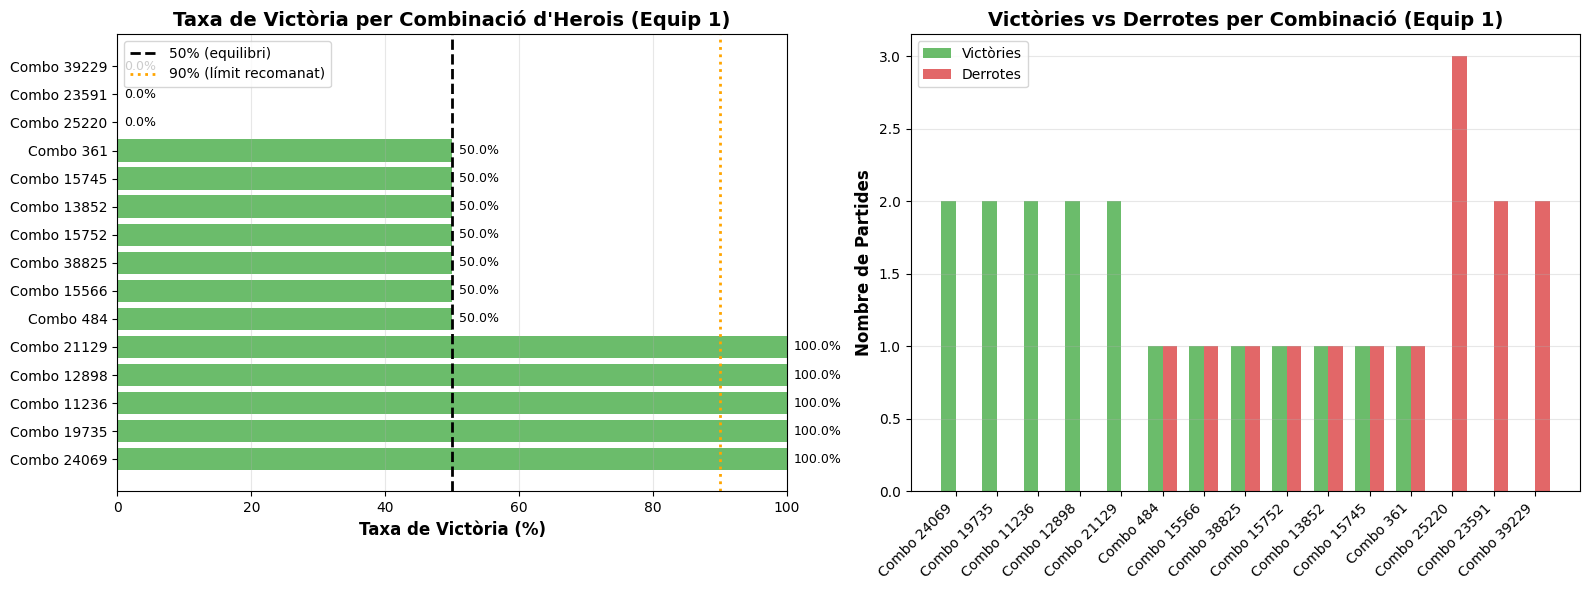


ESTADÍSTIQUES GLOBALS:
Taxa de victòria global de l'equip 1: 50.65%
Combinació amb taxa més alta: Combo 24069 (100.00%)
Combinació amb taxa més baixa: Combo 39229 (0.00%)

✓ COMBINACIONS AMB TAXA >= 90%:
  Índexs: [24069, 19735, 11236, 12898, 21129]
  Total: 5 combinacions
    - Combo 24069: 100.00% (2/2 victòries)
    - Combo 19735: 100.00% (2/2 victòries)
    - Combo 11236: 100.00% (2/2 victòries)
    - Combo 12898: 100.00% (2/2 victòries)
    - Combo 21129: 100.00% (2/2 victòries)


In [9]:
combos_recomanats = crear_grafica_i_analisi_de_combinacions_guanyades(DataSet_reduit, 'team1_comb_index', 1)

In [10]:
# Obtenir les dades dels herois recomanats en format DataFrame
print("="*80)
print("DADES DELS HEROIS A LES COMBINACIONS RECOMANADES")
print("="*80)

herois_data = obtenir_dades_herois(combos_recomanats, combinacions_equips_df)

# Crear el DataFrame
df_herois_recomanats = pd.DataFrame(herois_data)

print("\nDataFrame amb els herois de les combinacions recomanades:")
print("="*80)
print(df_herois_recomanats.to_string(index=False))
print("="*80)

# Mostrar estadístiques
print(f"\nTotal de combinacions: {df_herois_recomanats['combo_idx'].nunique()}")
print(f"Total de herois únics: {df_herois_recomanats['heroi_id'].nunique()}")

df_herois_recomanats

DADES DELS HEROIS A LES COMBINACIONS RECOMANADES
🚀 Carregant JSON per PRIMERA vegada...
Total de herois carregats: 139


DataFrame amb els herois de les combinacions recomanades:
 combo_idx  posicio  heroi_id          nom         key                     titol               tags
     24069        1        22         Ashe        Ashe          the Frost Archer  Marksman, Support
     24069        2        43        Karma       Karma       the Enlightened One      Mage, Support
     24069        3        57       Maokai      Maokai        the Twisted Treant         Tank, Mage
     24069        4       105         Fizz        Fizz       the Tidal Trickster  Assassin, Fighter
     24069        5       157        Yasuo       Yasuo            the Unforgiven  Fighter, Assassin
     19735        1        12      Alistar     Alistar              the Minotaur      Tank, Support
     19735        2        18     Tristana    Tristana         the Yordle Gunner Marksman, Assassin
     19735        3  

,combo_idx,posicio,heroi_id,nom,key,titol,tags
0,24069,1,22,Ashe,Ashe,the Frost Archer,"Marksman, Support"
1,24069,2,43,Karma,Karma,the Enlightened One,"Mage, Support"
2,24069,3,57,Maokai,Maokai,the Twisted Treant,"Tank, Mage"
3,24069,4,105,Fizz,Fizz,the Tidal Trickster,"Assassin, Fighter"
4,24069,5,157,Yasuo,Yasuo,the Unforgiven,"Fighter, Assassin"
5,19735,1,12,Alistar,Alistar,the Minotaur,"Tank, Support"
6,19735,2,18,Tristana,Tristana,the Yordle Gunner,"Marksman, Assassin"
7,19735,3,19,Warwick,Warwick,the Uncaged Wrath of Zaun,"Fighter, Tank"
8,19735,4,20,Nunu,Nunu,the Yeti Rider,"Support, Fighter"
9,19735,5,61,Orianna,Orianna,the Lady of Clockwork,"Mage, Support"


En aquest cas, només ens trobem amb un cas que obté una taxa de victòria de més del 90%, del 100%. Com podem apreciar, en les dades de cadascun dels herois, observem que tenen un tag que determina quines accions o quines són les seves responsabilitats. 

**Nota:** Tenim en compte que en aquest cas tingui un 100% de taxa de victòria pot ser enganyos.

Només em obtingut una combinació amb una taxa alta, crec que el millor pas, en aquest cas, seria mirar contra quins herois estaven competint, però això ho veurem més endavant.

El següent punt a observar és quins tags són els més utilitzats, quin és l'equilibri entre la quantitat de tags que té una combinació d'herois i la taxa de victoria.

In [11]:
herois_team1_win_com = count.copy()

data_herois = obtenir_dades_herois(herois_team1_win_com, combinacions_equips_df)
data_herois_df = pd.DataFrame(data_herois)
tags_count = data_herois_df['tags'].value_counts()
len(tags_count)
tags_count
del tags_count


Total de herois carregats: 139



In [12]:

data_herois_df['tags'] = data_herois_df['tags'].str.split(',')

# Després fer el mateix procés
tags_exploded = data_herois_df['tags'].explode()
tags_count_ind = tags_exploded.value_counts()

tags_count_ind
del tags_count_ind

Amb aquesta comparativa podem extreure les següents conclusions:
- El Tag d'heroi més utilitzat és el de **Mage**.
    - En la majoria de les combinacions de Tag, sempre està.
- No importa el Tag sol, sinó la combinació d'ells per determinar quin és l'heroi que millor funciona.

In [13]:
# Obtenir tags més comuns
top_n = 5
top_tags = data_herois_df['tags'].dropna().explode().value_counts().head(top_n).index
top_tags_set = set(top_tags)

# Crear una columna temporal amb el nombre de tags coincidents
def count_matching_tags(tags_list):
    if not isinstance(tags_list, list):
        return 0
    return sum(1 for tag in tags_list if tag in top_tags_set)

data_herois_df['matching_tags_count'] = data_herois_df['tags'].apply(count_matching_tags)

# Filtrar herois amb almenys 1 tag coincident i ordenar per rellevància
millors_herois_df = data_herois_df[data_herois_df['matching_tags_count'] > 0]
millors_herois_df = millors_herois_df.sort_values('matching_tags_count', ascending=False)

# Eliminar la columna temporal (opcional)
millors_herois_df = millors_herois_df.drop(columns=['matching_tags_count'])

# Guardar en llista
millors_herois = millors_herois_df.to_dict('records')
millors_herois_df = pd.DataFrame(millors_herois)
print(f"Obtenim un total de {len(millors_herois)} que tenen les 5 combinacions de tags amb més victories ({top_tags})")

millors_herois_df.head(5)

Obtenim un total de 128047 que tenen les 5 combinacions de tags amb més victories (Index(['Fighter', 'Assassin', ' Assassin', 'Marksman', ' Support'], dtype='object', name='tags'))


,combo_idx,posicio,heroi_id,nom,key,titol,tags
0,2,1,18,Tristana,Tristana,the Yordle Gunner,"[Marksman, Assassin]"
1,1,1,10,Kayle,Kayle,The Judicator,"[Fighter, Support]"
2,1,1,10,Kayle,Kayle,The Judicator,"[Fighter, Support]"
3,1,3,39,Irelia,Irelia,the Will of the Blades,"[Fighter, Assassin]"
4,1,3,39,Irelia,Irelia,the Will of the Blades,"[Fighter, Assassin]"


D'acord, ara que tenim això, podem fer una comparativa amb el següent equip

### Equip 2

In [14]:
# Obtenim les dades on l'equip 2 ha guanyat
DataSet_herois_2 = DataSet_reduit[DataSet_reduit['winner'] == 2]
count = DataSet_herois_2['team2_comb_index'].value_counts()

max = count.max()
min = count.min()

print(f"El nombre màxim de combinacions d'herois que ha guanyat un equip és: {max}")
print(f"El nombre mínim de combinacions d'herois que ha guanyat un equip és: {min}")

El nombre màxim de combinacions d'herois que ha guanyat un equip és: 2
El nombre mínim de combinacions d'herois que ha guanyat un equip és: 1


ANÀLISI: INFLUÈNCIA DE LES COMBINACIONS D'HEROIS EN LES VICTÒRIES

Top 15 combinacions d'herois (Equip 2):

Combo Idx    Partides     Victòries    Derrotes     Taxa Victòria  
-----------------------------------------------------------------
62120        2            2            0            100.00%
75474        2            2            0            100.00%
53678        2            1            1             50.00%
51905        2            1            1             50.00%
74297        2            1            1             50.00%
98856        2            1            1             50.00%
68418        2            1            1             50.00%
62121        2            1            1             50.00%
69069        3            0            3              0.00%
58599        2            0            2              0.00%
55439        2            0            2              0.00%
41305        2            0            2              0.00%
76364        2            0           

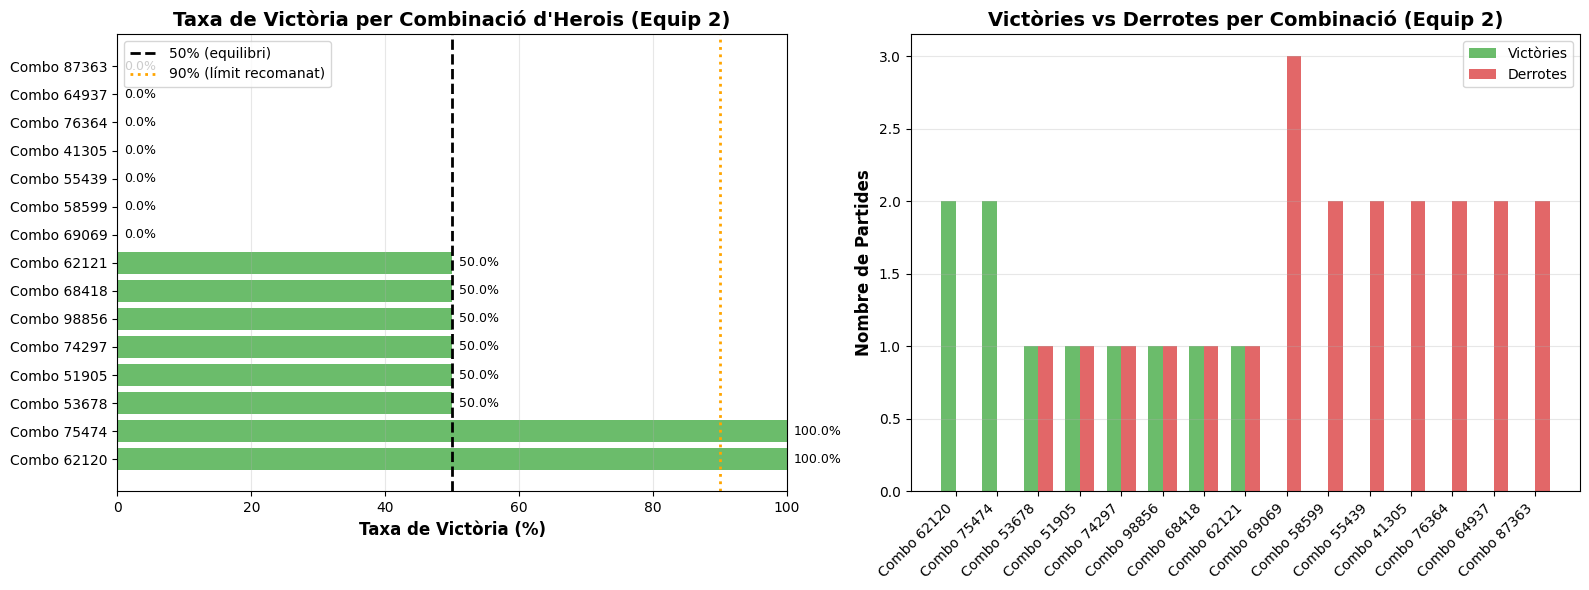


ESTADÍSTIQUES GLOBALS:
Taxa de victòria global de l'equip 2: 49.35%
Combinació amb taxa més alta: Combo 62120 (100.00%)
Combinació amb taxa més baixa: Combo 87363 (0.00%)

✓ COMBINACIONS AMB TAXA >= 90%:
  Índexs: [62120, 75474]
  Total: 2 combinacions
    - Combo 62120: 100.00% (2/2 victòries)
    - Combo 75474: 100.00% (2/2 victòries)


In [15]:
combos_recomanats = crear_grafica_i_analisi_de_combinacions_guanyades(DataSet_reduit, 'team2_comb_index', 2)

In [16]:
# Obtenir les dades dels herois recomanats en format DataFrame
print("="*80)
print("DADES DELS HEROIS A LES COMBINACIONS RECOMANADES")
print("="*80)

herois_recomanats_data = obtenir_dades_herois(combos_recomanats, combinacions_equips_df)

# Crear el DataFrame
df_herois_recomanats = pd.DataFrame(herois_recomanats_data)

print("\nDataFrame amb els herois de les combinacions recomanades:")
print("="*80)
print(df_herois_recomanats.to_string(index=False))
print("="*80)

# Mostrar estadístiques
print(f"\nTotal de combinacions: {df_herois_recomanats['combo_idx'].nunique()}")
print(f"Total de herois únics: {df_herois_recomanats['heroi_id'].nunique()}")

df_herois_recomanats

DADES DELS HEROIS A LES COMBINACIONS RECOMANADES
Total de herois carregats: 139


DataFrame amb els herois de les combinacions recomanades:
 combo_idx  posicio  heroi_id      nom      key                 titol               tags
     62120        1        18 Tristana Tristana     the Yordle Gunner Marksman, Assassin
     62120        2        61  Orianna  Orianna the Lady of Clockwork      Mage, Support
     62120        3       120  Hecarim  Hecarim     the Shadow of War      Fighter, Tank
     62120        4       122   Darius   Darius     the Hand of Noxus      Fighter, Tank
     62120        5       267     Nami     Nami        the Tidecaller      Support, Mage
     75474        1        16   Soraka   Soraka         the Starchild      Support, Mage
     75474        2        67    Vayne    Vayne      the Night Hunter Marksman, Assassin
     75474        3       101   Xerath   Xerath   the Magus Ascendant     Mage, Assassin
     75474        4       122   Darius   Darius     the Han

,combo_idx,posicio,heroi_id,nom,key,titol,tags
0,62120,1,18,Tristana,Tristana,the Yordle Gunner,"Marksman, Assassin"
1,62120,2,61,Orianna,Orianna,the Lady of Clockwork,"Mage, Support"
2,62120,3,120,Hecarim,Hecarim,the Shadow of War,"Fighter, Tank"
3,62120,4,122,Darius,Darius,the Hand of Noxus,"Fighter, Tank"
4,62120,5,267,Nami,Nami,the Tidecaller,"Support, Mage"
5,75474,1,16,Soraka,Soraka,the Starchild,"Support, Mage"
6,75474,2,67,Vayne,Vayne,the Night Hunter,"Marksman, Assassin"
7,75474,3,101,Xerath,Xerath,the Magus Ascendant,"Mage, Assassin"
8,75474,4,122,Darius,Darius,the Hand of Noxus,"Fighter, Tank"
9,75474,5,141,Kayn,Kayn,the Shadow Reaper,"Fighter, Assassin"


In [17]:
herois_team2_win_com = count.copy()

data_herois = obtenir_dades_herois(herois_team2_win_com, combinacions_equips_df)
data_herois_df = pd.DataFrame(data_herois)
tags_count = data_herois_df['tags'].value_counts()
len(tags_count)
tags_count


Total de herois carregats: 139



tags
Fighter, Assassin     24946
Fighter, Support      24915
Assassin              24915
Assassin, Fighter     24915
Marksman              24915
Marksman, Assassin       31
Assassin, Mage           31
Fighter, Mage            31
Support, Mage            31
Name: count, dtype: int64

In [18]:
# Obtenir tags més comuns
top_n = 5
top_tags = data_herois_df['tags'].dropna().explode().value_counts().head(top_n).index
top_tags_set = set(top_tags)

# Crear una columna temporal amb el nombre de tags coincidents
def count_matching_tags(tags_list):
    if not isinstance(tags_list, list):
        return 0
    return sum(1 for tag in tags_list if tag in top_tags_set)

data_herois_df['matching_tags_count'] = data_herois_df['tags'].apply(count_matching_tags)

# Filtrar herois amb almenys 1 tag coincident i ordenar per rellevància
millors_herois_df = data_herois_df[data_herois_df['matching_tags_count'] > 0]
millors_herois_df = millors_herois_df.sort_values('matching_tags_count', ascending=False)

# Eliminar la columna temporal (opcional)
millors_herois_df = millors_herois_df.drop(columns=['matching_tags_count'])

# Guardar en llista
millors_herois = millors_herois_df.to_dict('records')
millors_herois_df = pd.DataFrame(millors_herois)
print(f"Obtenim un total de {len(millors_herois)} que tenen les 5 combinacions de tags amb més victories ({top_tags})")

millors_herois_df.head(5)

Obtenim un total de 0 que tenen les 5 combinacions de tags amb més victories (Index(['Fighter, Assassin', 'Fighter, Support', 'Assassin',
       'Assassin, Fighter', 'Marksman'],
      dtype='object', name='tags'))


""


### Combinació entre els herois de cada equip
Anem a comparar les combinacions de campions de cada equip i comparar-los

In [19]:
resultats = analisi_profund_combinacions_compartides(DataSet_reduit, combinacions_equips_df)
resultats

ANÀLISI DE COMBINACIONS COMPARTIDES

Total combinacions úniques: 50470
Combinacions amb victòries ambdós equips: 92

Top 10 combinacions més versàtils:
----------------------------------------------------------------------------------------------------

Combo 45:
  Herois IDs: [61, 64, 150, 222, 497, '61-64-150-222-497']
  Victòries: 1 com Team1, 1 com Team2
  Win rates: 100.0% (T1) vs 100.0% (T2)
  Win rate global: 100.0%

Combo 40747:
  Herois IDs: [41, 64, 105, 412, 498, '41-64-105-412-498']
  Victòries: 1 com Team1, 1 com Team2
  Win rates: 100.0% (T1) vs 100.0% (T2)
  Win rate global: 100.0%

Combo 38503:
  Herois IDs: [24, 38, 64, 497, 498, '24-38-64-497-498']
  Victòries: 1 com Team1, 1 com Team2
  Win rates: 100.0% (T1) vs 100.0% (T2)
  Win rate global: 100.0%

Combo 38072:
  Herois IDs: [40, 64, 68, 245, 498, '40-64-68-245-498']
  Victòries: 1 com Team1, 1 com Team2
  Win rates: 100.0% (T1) vs 100.0% (T2)
  Win rate global: 100.0%

Combo 37502:
  Herois IDs: [57, 157, 497, 498

c:\Users\Laia\OneDrive\Escritorio\UNI\3. Aprenentatge Computacional\Projecte Kaggle\Kaggle-Code\Anàlisi_de_dades\Combinacions_herois_i_encanteris.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combos_amb_exit_ambdos['win_rate_global'] = (


,combo_idx,partides_team1,victorias_team1,win_rate_team1,partides_team2,victorias_team2,win_rate_team2,diferencia_win_rate,win_rate_global
24,45,1,1,100.0,1,1,100.0,0.0,100.000000
20682,40747,1,1,100.0,1,1,100.0,0.0,100.000000
19548,38503,1,1,100.0,1,1,100.0,0.0,100.000000
19335,38072,1,1,100.0,1,1,100.0,0.0,100.000000
19034,37502,1,1,100.0,1,1,100.0,0.0,100.000000
...,...,...,...,...,...,...,...,...,...
20765,40940,1,1,100.0,2,1,50.0,50.0,66.666667
2544,5027,2,1,50.0,1,1,100.0,50.0,66.666667
8004,15752,2,1,50.0,1,1,100.0,50.0,66.666667
4436,8756,1,1,100.0,2,1,50.0,50.0,66.666667


Ens em trobat amb **92 combinacions de campions** els quals s'han fet servir pels dos equips anteriorment i que han guanyat.

A continuació, mirarem quines combinacions han funcionat correctamet per un equip, però malament amb l'altre.

In [20]:
# Equip 1
obtenir_combinacions_unilaterals(DataSet_reduit, 1)


🚀 Combinacions FORTES per Equip 1 (win rate ≥ 60%):


[]

In [21]:
# Equip 2
obtenir_combinacions_unilaterals(DataSet_reduit, 2)


🚀 Combinacions FORTES per Equip 2 (win rate ≥ 60%):


[]

Per sorpresa no trobem a **cap** combinació que funcioni millor en un equip que en un altre.

#### Correlacions entre combinacions
Analitzar correlacions entre diferents combinacions de campions

In [22]:
print("ANÀLISI 1: Correlacions entre combinacions similars")
correl_df, win_rates, combos_sel = analitzar_correlacions_performance_optimitzat(
    DataSet_reduit, 
    combinacions_equips_df,
    top_n=200  # Comença amb 200, augmenta si pots
)

ANÀLISI 1: Correlacions entre combinacions similars
ANÀLISI DE CORRELACIONS (VERSIÓ OPTIMITZADA)

1. Seleccionant combinacions més freqüents...
   Total combinacions úniques: 101449
   Combinacions seleccionades (top 200): 200
   Cobertura aproximada: 0.8% de partides

2. Calculant win rates...

3. Calculant similituds (mostratge aleatori)...
   Parells analitzats: 0

5. Estadístiques:

Resum de similituds:


KeyError: 'similitud'

#### Correlacions contra combinacions comunes
Analitzar correlacions contra combinacions comunes

In [ ]:
print("\n\nANÀLISI 2: Rendiment contra combinacions comunes")
resultats_contra, enfrontaments = analitzar_correlacions_contra_comunes_optimitzat(
    DataSet_reduit,
    combinacions_equips_df,
    min_partides=3  # Redueix a 3 si encara no hi ha prou dades
)

#### Patrons de Sinergia entre combinacions
Analitzar patrons de sinergia entre herois

In [ ]:
print("\n\nANÀLISI 3: Patterns de sinergia entre herois")
# Primer obtenir herois_data
herois_data = {}
herois_json = carregar_herois_cache()
if 'data' in herois_json:
    for champ_info in herois_json['data'].values():
        if 'id' in champ_info:
            herois_data[champ_info['id']] = champ_info

sinergia_df = analitzar_patterns_sinergia(
    DataSet_reduit, combinacions_equips_df, herois_data
)

## Encanteris